# Lead Scoring Case Study

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## Objective 
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
#importing numpy and pandas
import numpy as np, pandas as pd

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding data

In [2]:
#reading the dataframe
leads = pd.read_csv('leads.csv')

In [3]:
#checking the shape of dataframe
leads.shape

(9240, 37)

Dataset contains `37` columns and `9240` rows

In [4]:
#checking the datatypes of columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#viewing the dataframe
pd.set_option('display.max_columns', None)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# current conversion rate of leads
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

38.53896103896104

Conversion rate is `38.53`%

## Data cleaning

**There are some data entries given as 'select' which basically means that while filling out the details that option has been left out empty. Therefore replacing those with Null values**

In [7]:
#replacing select with Null values
leads['Specialization'] = leads['Specialization'].replace(['Select','select'],np.NaN)
leads['How did you hear about X Education'] = leads['How did you hear about X Education'].replace('Select',np.NaN)
leads['Lead Profile'] = leads['Lead Profile'].replace('Select',np.NaN)
leads.City = leads.City.replace(['Select','select'],np.NaN)

In [8]:
#looking at the null percentage in each of the columns
print(100*leads.isnull().sum()/len(leads))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

Most of the columns have very high percentage of null values. So dropping columns with nuls greater than 40% and some cloumns which are not necessary for further analysis.

In [9]:
#dropping columns with null % greater than 40
drop_cols = leads.columns[(leads.isnull().sum()/len(leads.index)>0.4)]
leads = leads.drop(drop_cols, axis=1)

In [10]:
# separating object datatype columns
object_cols = ['Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation','What matters most to you in choosing a course', 'Search', 'Magazine',
        'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations', 
        'Receive More Updates About Our Courses', 'Tags', 
        'Update me on Supply Chain Content', 'Get updates on DM Content', 
        'City', 'I agree to pay the amount through cheque', 
        'A free copy of Mastering The Interview', 'Last Notable Activity']

In [11]:
#looking at the unique values of each column
for i in object_cols:
    print(i)
    print(leads[i].value_counts())
    print('\n')

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
WeLearn                 1
testone                 1
NC_EDM                  1
blog                    1
youtubechannel          1
Pay per Click Ads       1
welearnblog_Home        1
Name: Lead Source, dtype: int64


Do Not Email
No     8506
Yes     734
Name: Do Not Email, dtype: int64


Do Not Call
No     9238
Yes       2
Name: Do Not Call, dtype: int64


Last Activity
Email Opened                    3437
SMS Sent 

After looking at this values, observed most of the columns skewed towards a particular value. So dropping them and replacing some of them to others

In [12]:
#dropping columns where majority of the data is same
drop_cols1 = ['Do Not Email','Do Not Call','Country','What matters most to you in choosing a course', 
             'Search', 'Magazine', 'Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement', 
             'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
             'Get updates on DM Content', 'I agree to pay the amount through cheque', 
              'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']
leads = leads.drop(drop_cols1, axis=1)

In [13]:
# dropping columns not necessary for analysis
leads = leads.drop(columns=['Tags','Last Notable Activity'], axis=1)

In [14]:
#combining the categorical variables with less % as other
leads['Lead Origin'] = leads['Lead Origin'].replace(['Lead Add Form', 'Lead Import', 'Quick Add Form'],'Other_source')

In [15]:
#combining the categorical variables with less % as other
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace(['Facebook','bing','Click2call','Social Media', 'Live Chat', 
                                                    'Press_Release','blog', 'welearnblog_Home','youtubechannel', 
                                                     'testone', 'Pay per Click Ads', 'WeLearn', 'NC_EDM', 
                                                     'Welingak Website'], 'Other_source')
leads['Lead Source'] = leads['Lead Source'].replace(['Reference','Referral Sites'],'Referrals')
leads['Lead Source'] = leads['Lead Source'].fillna('Other_source')

In [16]:
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation','Approached upfront', 
                                                         'View in browser link Clicked','Email Marked Spam', 
                                                         'Email Received', 'Visited Booth in Tradeshow', 
                                                         'Resubscribed to emails'],'Other_Activity')
leads['Last Activity'] = leads['Last Activity'].fillna('Other_Activity')

In [17]:
# null values would mean that the specialization is not mentioned in the given options
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Other_specialization')

In [18]:
#changing the column name as occupation
leads.rename(columns = {'What is your current occupation':'Occupation'},inplace = True)

In [19]:
#null values in the occupation field would mean that they are unemployed
leads['Occupation'] = leads['Occupation'].replace(np.nan, 'Unemployed')
leads['Occupation'] = leads['Occupation'].replace(['Other','Housewife','Businessman'],'Other_occupation')

In [20]:
leads['City'] = leads['City'].replace(['Other Metro Cities','Tier II Cities'],'Other Cities')
leads['City'] = leads['City'].replace(np.nan, 'Other Cities')

In [21]:
#checking the percentiles
leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


Since there are outliers present in the data. Replacing nulls with median.

In [22]:
#filling the null values with the median
leads['TotalVisits'] = leads['TotalVisits'].fillna(leads.TotalVisits.median())

In [23]:
#filling the null values with the median
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median())

In [24]:
#looking at the datatypes of columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Prospect ID                  9240 non-null   object 
 1   Lead Number                  9240 non-null   int64  
 2   Lead Origin                  9240 non-null   object 
 3   Lead Source                  9240 non-null   object 
 4   Converted                    9240 non-null   int64  
 5   TotalVisits                  9240 non-null   float64
 6   Total Time Spent on Website  9240 non-null   int64  
 7   Page Views Per Visit         9240 non-null   float64
 8   Last Activity                9240 non-null   object 
 9   Specialization               9240 non-null   object 
 10  Occupation                   9240 non-null   object 
 11  City                         9240 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 866.4+ KB


**Data is clean and no null values are observed**

## Data visualisation

In [25]:
#importing the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

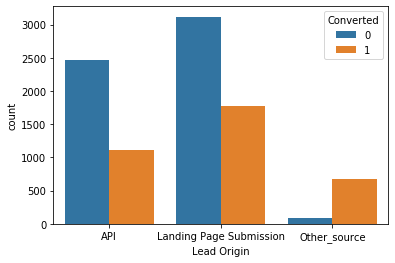

In [26]:
#looking at the convesions based on different lead origins
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = leads)
plt.show()

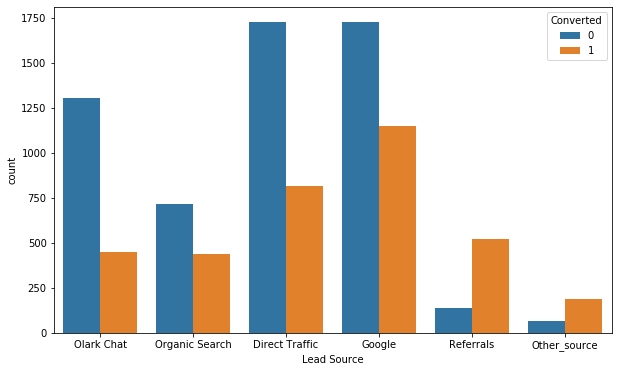

In [27]:
#looking at the convesions based on different lead sources
plt.figure(figsize=(10,6))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = leads)
plt.show()

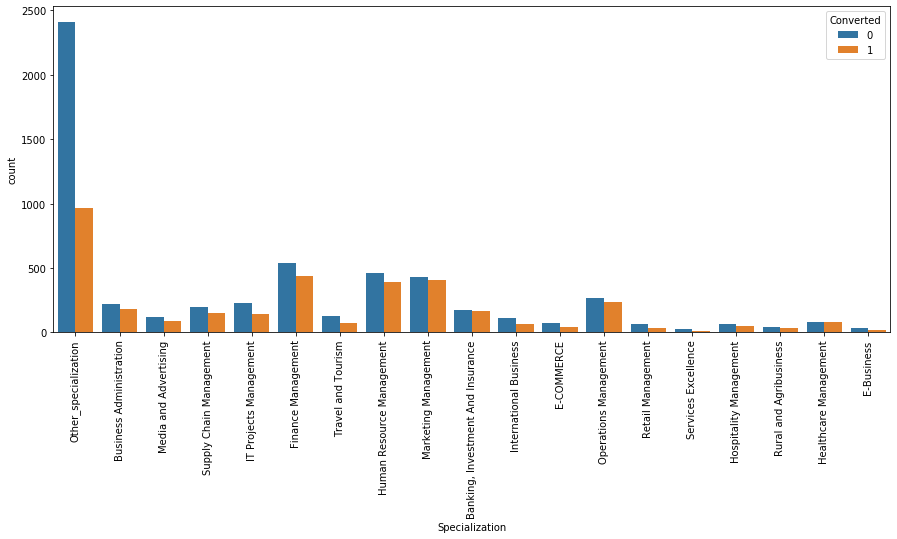

In [28]:
#looking at the convesions based on different specialtizations
plt.figure(figsize=(15,6))
sns.countplot(x = 'Specialization', hue = 'Converted', data = leads)
plt.xticks(rotation = 90)
plt.show()

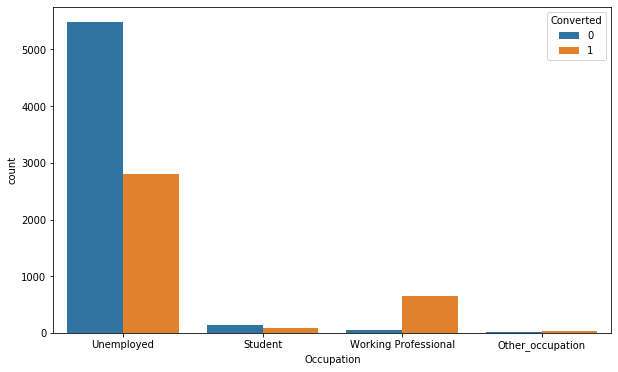

In [29]:
#looking at the convesions based on occupation
plt.figure(figsize=(10,6))
sns.countplot(x = 'Occupation', hue = 'Converted', data = leads)
# plt.xticks(rotation = 90)
plt.show()

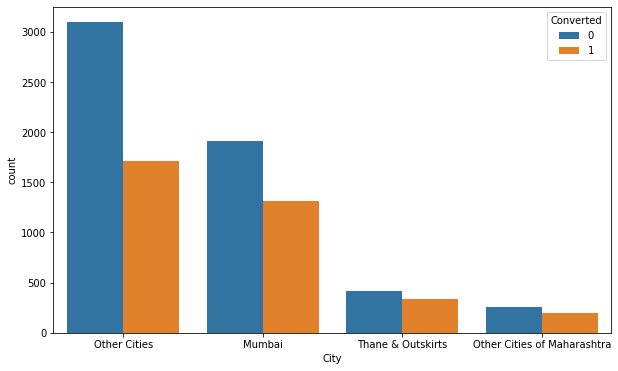

In [30]:
#looking at the convesions based on loacted cities
plt.figure(figsize=(10,6))
sns.countplot(x = 'City', hue = 'Converted', data = leads)
plt.show()

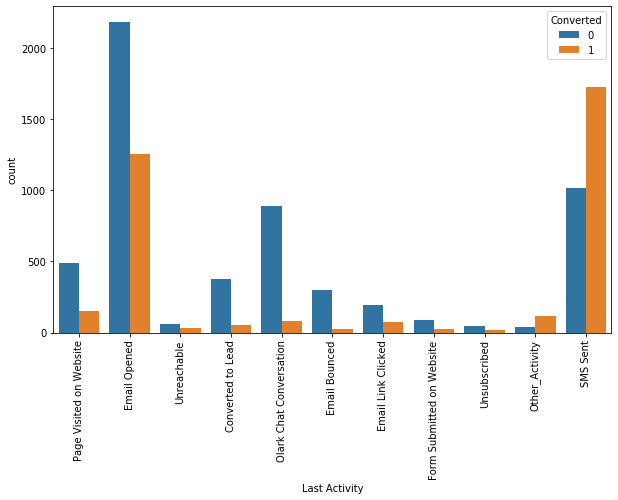

In [31]:
#looking at the convesions based on last activity
plt.figure(figsize=(10,6))
sns.countplot(x = 'Last Activity', hue = 'Converted', data = leads)
plt.xticks(rotation = 90)
plt.show()

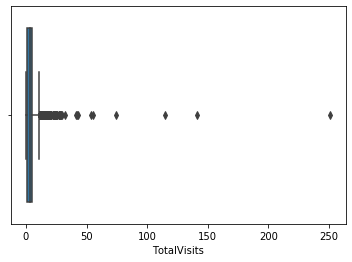

In [32]:
#boxplot of total visits
sns.boxplot(leads['TotalVisits'])
plt.show()

In [33]:
#handling the outliers of total visits column
percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

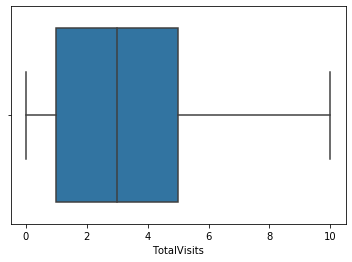

In [34]:
#boxplot after caping
sns.boxplot(leads['TotalVisits'])
plt.show()

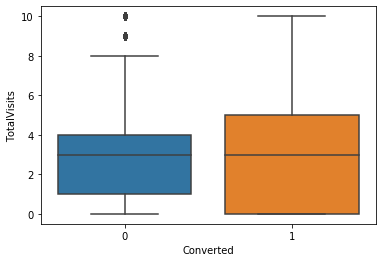

In [35]:
#looking at the convesions based on total visits
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

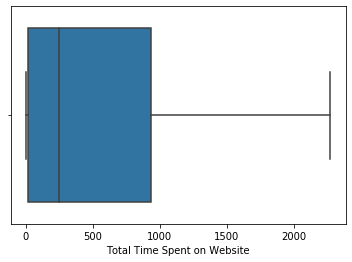

In [36]:
#boxplot after plotting
sns.boxplot(leads['Total Time Spent on Website'])
plt.show()

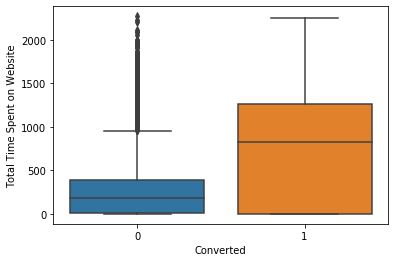

In [37]:
#looking at the convesions based on total time spent on website
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

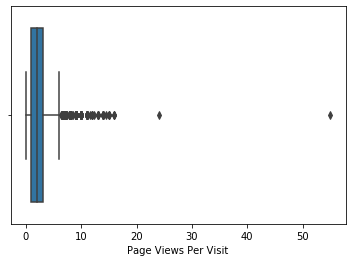

In [38]:
#looking at the distribution of Page Views Per Visit
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

In [39]:
#handling the outliers of Page Views Per Visit
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

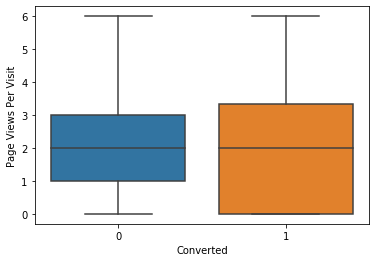

In [40]:
#looking at the convesions based on page views per visit
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

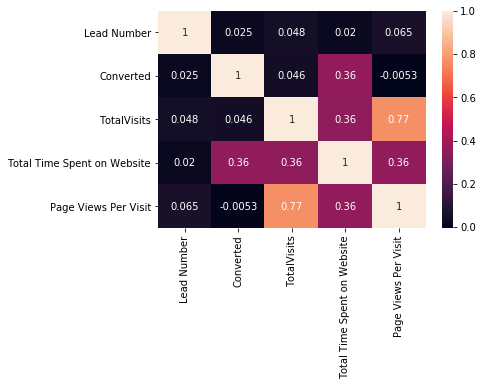

In [41]:
#looking at the correlation between the columns 
sns.heatmap(leads.corr(),annot = True)
plt.show()

From the heatmap it is observed total visits and page views per visit are highly correlated.

## Data preparation

In [42]:
#creating the dummy variables for the categorical columns
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','Occupation','City']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [43]:
#dropping main columns after creating dummies
leads = leads.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','Occupation','City'], axis=1)

In [44]:
#inspecting the columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 47 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Converted                                 9240 non-null   int64  
 3   TotalVisits                               9240 non-null   float64
 4   Total Time Spent on Website               9240 non-null   int64  
 5   Page Views Per Visit                      9240 non-null   float64
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Other_source                  9240 non-null   uint8  
 8   Lead Source_Google                        9240 non-null   uint8  
 9   Lead Source_Olark Chat                    9240 non-null   uint8  
 10  Lead Source_Organic Search          

**Splitting the data into train and test**

In [45]:
#importing the library to split the model into train and test
from sklearn.model_selection import train_test_split

In [46]:
#taking the varibles into X
X = leads.drop(['Prospect ID','Lead Number','Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Other_source,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_source,Lead Source_Referrals,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Thane & Outskirts
0,0.0,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,5.0,674,2.5,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [47]:
#taking the target variable
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [48]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

**Scaling the data**

In [49]:
#importing library for scalling the data, here standardization is used
from sklearn.preprocessing import StandardScaler

In [50]:
#scalling the data and looking at the scaled data
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Other_source,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_source,Lead Source_Referrals,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Thane & Outskirts
1871,-1.149699,-0.885371,-1.266675,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
6795,0.299722,0.005716,-0.516439,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3516,0.662077,-0.691418,0.143543,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
8105,0.662077,1.365219,1.553761,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3934,-1.149699,-0.885371,-1.266675,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0


## Model building

In [51]:
#importing the statsmoedls library 
import statsmodels.api as sm

**Model 1**

In [52]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6423
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2713.6
Date:                Mon, 07 Sep 2020   Deviance:                       5427.3
Time:                        20:34:14   Pearson chi2:                 7.52e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.5307      0.619     -0.857      0.391      -1.744       0.682
TotalVisits                                  0.3450      0.054      6.340      0.000       0.238       0.452
Total Time Spent on Website                  1.0701      0.040     26.907      0.000       0.992       1.148
Page Views Per Visit                        -0.3752      0.061     -6.193      0.000      -0.494      -0.256
Lead Origin_Landing Page Submission         -0.9104      0.139     -6.570      0.000      -1.182      -0.639
Lead Origin_Other_source                     2.8762      0.332      8.662      0.000       2.225       3.527
Lead Source_Google                           0.3671      0.096      3.824      0.000       0.179       0.555
Lead Source_Olark Chat                       1.2120      0.159      7.638      0.000       0.901       1.523
Lead Source_Organic Search                   0.2095      0.129      1.620      0.105      -0.044       0.463
Lead Source_Other_source                     0.2024      0.365      0.555      0.579      -0.513       0.918
Lead Source_Referrals                        0.3533      0.288      1.228      0.220      -0.211       0.917
Last Activity_Email Bounced                 -0.6747      0.361     -1.871      0.061      -1.382       0.032
Last Activity_Email Link Clicked             0.7241      0.305      2.377      0.017       0.127       1.321
Last Activity_Email Opened                   1.2228      0.224      5.466      0.000       0.784       1.661
Last Activity_Form Submitted on Website      0.2232      0.400      0.557      0.577      -0.562       1.008
Last Activity_Olark Chat Conversation       -0.3175      0.274     -1.157      0.247      -0.855       0.220
Last Activity_Other_Activity                 0.8862      0.388      2.282      0.022       0.125       1.647
Last Activity_Page Visited on Website        0.3708      0.262      1.416      0.157      -0.142       0.884
Last Activity_SMS Sent                       2.3642      0.225     10.515      0.000       1.923       2.805
Last Activity_Unreachable                    1.2101      0.415      2.917      0.004       0.397       2.023
Last Activity_Unsubscribed                   0.6920      0.506      1.367      0.172      -0.300       1.684
Specialization_Business Administration      -0.3433      0.243     -1.412      0.158      -0.820       0.133
Specialization_E-Business                   -0.0279      0.483     -0.058      0.954      -0.974       0.919
Specialization_E-COMMERCE                    0.0433      0.342      0.127      0.899      -0.627       0.713
Specialization_Finance Management           -0.0336      0.208     -0.162      0.871      -0.441       0.374
Specialization_Healthcare Manag

**Selecting variables through RFE**

In [53]:
#importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


In [54]:
# running RFE with 20 variables as output
logreg = LogisticRegression()
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [55]:
#looking at the variables
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Other_source', True, 1),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 8),
 ('Lead Source_Other_source', False, 6),
 ('Lead Source_Referrals', False, 5),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 23),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 9),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('Last Activity_Unsubscribed', False, 3),
 ('Specialization_Business Administration', False, 7),
 ('Specialization_E-Business', False, 21),
 ('Specialization_E-COMMERCE', False, 17),
 ('S

In [56]:
#taking those variables into col
col = X_train.columns[rfe.support_]

**Model 2**

In [57]:
#logistic regression model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2727.3
Date:                Mon, 07 Sep 2020   Deviance:                       5454.6
Time:                        20:34:18   Pearson chi2:                 7.48e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.1436      0.548     -0.262      0.793      -1.217       0.930
TotalVisits                               0.3655      0.052      7.019      0.000       0.263       0.468
Total Time Spent on Website               1.0706      0.039     27.109      0.000       0.993       1.148
Page Views Per Visit                     -0.3510      0.059     -5.934      0.000      -0.467      -0.235
Lead Origin_Landing Page Submission      -1.0671      0.127     -8.375      0.000      -1.317      -0.817
Lead Origin_Other_source                  2.9168      0.183     15.900      0.000       2.557       3.276
Lead Source_Olark Chat                    0.9693      0.139      6.993      0.000       0.698       1.241
Last Activity_Email Bounced              -0.9671      0.309     -3.125      0.002      -1.574      -0.361
Last Activity_Email Link Clicked          0.4661      0.238      1.961      0.050       0.000       0.932
Last Activity_Email Opened                0.9591      0.119      8.030      0.000       0.725       1.193
Last Activity_Olark Chat Conversation    -0.5702      0.197     -2.890      0.004      -0.957      -0.184
Last Activity_Other_Activity              0.5904      0.335      1.760      0.078      -0.067       1.248
Last Activity_SMS Sent                    2.1004      0.123     17.029      0.000       1.859       2.342
Last Activity_Unreachable                 1.0259      0.364      2.822      0.005       0.313       1.738
Specialization_Hospitality Management    -1.0591      0.325     -3.262      0.001      -1.695      -0.423
Specialization_Other_specialization      -1.1188      0.121     -9.257      0.000      -1.356      -0.882
Specialization_Retail Management         -0.4288      0.332     -1.293      0.196      -1.079       0.221
Specialization_Rural and Agribusiness     0.4857      0.391      1.243      0.214      -0.280       1.252
Occupation_Student                       -0.6488      0.583     -1.113      0.266      -1.791       0.494
Occupation_Unemployed                    -1.0713      0.535     -2.004      0.045      -2.119      -0.023
Occupation_Working Professional           1.6695      0.565      2.957      0.003       0.563       2.776
=========================================================================================================
"""

**Checking VIF scores**

In [58]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Occupation_Unemployed,16.46
3,Lead Origin_Landing Page Submission,7.19
14,Specialization_Other_specialization,4.53
8,Last Activity_Email Opened,3.78
11,Last Activity_SMS Sent,3.39
2,Page Views Per Visit,3.19
5,Lead Source_Olark Chat,3.07
0,TotalVisits,2.53
19,Occupation_Working Professional,2.15
9,Last Activity_Olark Chat Conversation,2.14


As Occupation_Unemployed have a high value of 16.46. Dropping that variable

In [60]:
#dropping Occupation_Unemployed
col = col.drop('Occupation_Unemployed', 1)

**Model 3**

In [61]:
# re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2729.4
Date:                Mon, 07 Sep 2020   Deviance:                       5458.7
Time:                        20:34:19   Pearson chi2:                 7.50e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.1963      0.156     -7.675      0.000      -1.502      -0.891
TotalVisits                               0.3668      0.052      7.046      0.000       0.265       0.469
Total Time Spent on Website               1.0722      0.039     27.156      0.000       0.995       1.150
Page Views Per Visit                     -0.3512      0.059     -5.940      0.000      -0.467      -0.235
Lead Origin_Landing Page Submission      -1.0745      0.127     -8.436      0.000      -1.324      -0.825
Lead Origin_Other_source                  2.9242      0.183     15.948      0.000       2.565       3.284
Lead Source_Olark Chat                    0.9688      0.139      6.991      0.000       0.697       1.240
Last Activity_Email Bounced              -0.9787      0.310     -3.161      0.002      -1.585      -0.372
Last Activity_Email Link Clicked          0.4616      0.237      1.947      0.052      -0.003       0.926
Last Activity_Email Opened                0.9537      0.119      7.993      0.000       0.720       1.188
Last Activity_Olark Chat Conversation    -0.5680      0.197     -2.885      0.004      -0.954      -0.182
Last Activity_Other_Activity              0.5794      0.335      1.728      0.084      -0.078       1.237
Last Activity_SMS Sent                    2.0899      0.123     16.971      0.000       1.849       2.331
Last Activity_Unreachable                 1.0359      0.360      2.874      0.004       0.329       1.742
Specialization_Hospitality Management    -1.0670      0.325     -3.286      0.001      -1.703      -0.431
Specialization_Other_specialization      -1.1295      0.121     -9.348      0.000      -1.366      -0.893
Specialization_Retail Management         -0.4354      0.332     -1.313      0.189      -1.086       0.215
Specialization_Rural and Agribusiness     0.4792      0.391      1.226      0.220      -0.287       1.245
Occupation_Student                        0.4176      0.238      1.753      0.080      -0.049       0.885
Occupation_Working Professional           2.7341      0.192     14.270      0.000       2.359       3.110
=========================================================================================================
"""

In [62]:
#checking VIF's
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,3.20
2,Page Views Per Visit,3.19
5,Lead Source_Olark Chat,2.89
8,Last Activity_Email Opened,2.79
14,Specialization_Other_specialization,2.72
11,Last Activity_SMS Sent,2.66
0,TotalVisits,2.49
9,Last Activity_Olark Chat Conversation,1.89
4,Lead Origin_Other_source,1.87
1,Total Time Spent on Website,1.30


All the VIF's are below 5. P value of Specialization_Rural and Agribusiness is 0.220. So dropping that variable.

In [63]:
# dropping Specialization_Rural and Agribusiness
col = col.drop('Specialization_Rural and Agribusiness',1)

**Model 4**

In [64]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2730.1
Date:                Mon, 07 Sep 2020   Deviance:                       5460.2
Time:                        20:34:20   Pearson chi2:                 7.50e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.1885      0.156     -7.637      0.000      -1.494      -0.883
TotalVisits                               0.3678      0.052      7.069      0.000       0.266       0.470
Total Time Spent on Website               1.0718      0.039     27.152      0.000       0.994       1.149
Page Views Per Visit                     -0.3526      0.059     -5.966      0.000      -0.468      -0.237
Lead Origin_Landing Page Submission      -1.0738      0.127     -8.436      0.000      -1.323      -0.824
Lead Origin_Other_source                  2.9236      0.183     15.945      0.000       2.564       3.283
Lead Source_Olark Chat                    0.9699      0.139      6.999      0.000       0.698       1.241
Last Activity_Email Bounced              -0.9811      0.310     -3.168      0.002      -1.588      -0.374
Last Activity_Email Link Clicked          0.4558      0.237      1.923      0.054      -0.009       0.920
Last Activity_Email Opened                0.9513      0.119      7.977      0.000       0.718       1.185
Last Activity_Olark Chat Conversation    -0.5730      0.197     -2.911      0.004      -0.959      -0.187
Last Activity_Other_Activity              0.5751      0.335      1.716      0.086      -0.082       1.232
Last Activity_SMS Sent                    2.0868      0.123     16.958      0.000       1.846       2.328
Last Activity_Unreachable                 1.0292      0.360      2.856      0.004       0.323       1.736
Specialization_Hospitality Management    -1.0725      0.325     -3.303      0.001      -1.709      -0.436
Specialization_Other_specialization      -1.1355      0.121     -9.410      0.000      -1.372      -0.899
Specialization_Retail Management         -0.4416      0.332     -1.332      0.183      -1.092       0.208
Occupation_Student                        0.4350      0.237      1.833      0.067      -0.030       0.900
Occupation_Working Professional           2.7317      0.192     14.265      0.000       2.356       3.107
=========================================================================================================
"""

P value of Specialization_Retail Management is 0.183. So dropping this variable.

In [65]:
# dropping Specialization_Retail Management
col = col.drop('Specialization_Retail Management',1)

**Model 5**

In [66]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2731.0
Date:                Mon, 07 Sep 2020   Deviance:                       5462.0
Time:                        20:34:20   Pearson chi2:                 7.55e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.1960      0.156     -7.687      0.000      -1.501      -0.891
TotalVisits                               0.3681      0.052      7.077      0.000       0.266       0.470
Total Time Spent on Website               1.0703      0.039     27.140      0.000       0.993       1.148
Page Views Per Visit                     -0.3518      0.059     -5.956      0.000      -0.468      -0.236
Lead Origin_Landing Page Submission      -1.0772      0.127     -8.461      0.000      -1.327      -0.828
Lead Origin_Other_source                  2.9226      0.183     15.941      0.000       2.563       3.282
Lead Source_Olark Chat                    0.9685      0.139      6.989      0.000       0.697       1.240
Last Activity_Email Bounced              -0.9834      0.310     -3.174      0.002      -1.591      -0.376
Last Activity_Email Link Clicked          0.4629      0.237      1.954      0.051      -0.001       0.927
Last Activity_Email Opened                0.9558      0.119      8.015      0.000       0.722       1.189
Last Activity_Olark Chat Conversation    -0.5677      0.197     -2.885      0.004      -0.953      -0.182
Last Activity_Other_Activity              0.5817      0.335      1.736      0.083      -0.075       1.239
Last Activity_SMS Sent                    2.0893      0.123     16.973      0.000       1.848       2.331
Last Activity_Unreachable                 1.0245      0.361      2.837      0.005       0.317       1.732
Specialization_Hospitality Management    -1.0642      0.325     -3.278      0.001      -1.700      -0.428
Specialization_Other_specialization      -1.1304      0.121     -9.370      0.000      -1.367      -0.894
Occupation_Student                        0.4293      0.237      1.809      0.070      -0.036       0.894
Occupation_Working Professional           2.7320      0.192     14.259      0.000       2.357       3.108
=========================================================================================================
"""

Last Activity_Other_Activity has p value of 0.083. So dropping that variable.

In [67]:
# dropping Last Activity_Other_Activity
col = col.drop('Last Activity_Other_Activity',1)

**Model 6**

In [68]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.6
Date:                Mon, 07 Sep 2020   Deviance:                       5465.1
Time:                        20:34:21   Pearson chi2:                 7.31e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.1489      0.153     -7.532      0.000      -1.448      -0.850
TotalVisits                               0.3673      0.052      7.070      0.000       0.266       0.469
Total Time Spent on Website               1.0737      0.039     27.300      0.000       0.997       1.151
Page Views Per Visit                     -0.3411      0.059     -5.815      0.000      -0.456      -0.226
Lead Origin_Landing Page Submission      -1.0741      0.127     -8.439      0.000      -1.324      -0.825
Lead Origin_Other_source                  3.0134      0.177     17.064      0.000       2.667       3.359
Lead Source_Olark Chat                    0.9892      0.138      7.167      0.000       0.719       1.260
Last Activity_Email Bounced              -1.0531      0.308     -3.414      0.001      -1.658      -0.449
Last Activity_Email Link Clicked          0.3976      0.234      1.700      0.089      -0.061       0.856
Last Activity_Email Opened                0.8937      0.113      7.922      0.000       0.673       1.115
Last Activity_Olark Chat Conversation    -0.6285      0.193     -3.253      0.001      -1.007      -0.250
Last Activity_SMS Sent                    2.0267      0.117     17.367      0.000       1.798       2.255
Last Activity_Unreachable                 0.9652      0.360      2.683      0.007       0.260       1.670
Specialization_Hospitality Management    -1.0770      0.325     -3.313      0.001      -1.714      -0.440
Specialization_Other_specialization      -1.1209      0.121     -9.299      0.000      -1.357      -0.885
Occupation_Student                        0.4274      0.237      1.801      0.072      -0.038       0.893
Occupation_Working Professional           2.7423      0.192     14.312      0.000       2.367       3.118
=========================================================================================================
"""

p value of Last Activity_Email Link Clicked is 0.089. Dropping this variable.

In [69]:
#drop Last Activity_Email Link Clicked
col = col.drop('Last Activity_Email Link Clicked',1)

**Model 7**

In [70]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2734.0
Date:                Mon, 07 Sep 2020   Deviance:                       5467.9
Time:                        20:34:21   Pearson chi2:                 7.33e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0826      0.147     -7.384      0.000      -1.370      -0.795
TotalVisits                               0.3617      0.052      6.987      0.000       0.260       0.463
Total Time Spent on Website               1.0713      0.039     27.281      0.000       0.994       1.148
Page Views Per Visit                     -0.3365      0.059     -5.749      0.000      -0.451      -0.222
Lead Origin_Landing Page Submission      -1.0735      0.127     -8.438      0.000      -1.323      -0.824
Lead Origin_Other_source                  3.0135      0.177     17.048      0.000       2.667       3.360
Lead Source_Olark Chat                    0.9995      0.138      7.247      0.000       0.729       1.270
Last Activity_Email Bounced              -1.1204      0.305     -3.668      0.000      -1.719      -0.522
Last Activity_Email Opened                0.8251      0.104      7.903      0.000       0.620       1.030
Last Activity_Olark Chat Conversation    -0.7032      0.188     -3.748      0.000      -1.071      -0.335
Last Activity_SMS Sent                    1.9574      0.108     18.065      0.000       1.745       2.170
Last Activity_Unreachable                 0.8984      0.357      2.516      0.012       0.198       1.598
Specialization_Hospitality Management    -1.0795      0.325     -3.320      0.001      -1.717      -0.442
Specialization_Other_specialization      -1.1185      0.120     -9.283      0.000      -1.355      -0.882
Occupation_Student                        0.4231      0.237      1.782      0.075      -0.042       0.888
Occupation_Working Professional           2.7374      0.191     14.318      0.000       2.363       3.112
=========================================================================================================
"""

P value of Occupation_Student is 0.075

In [71]:
#dropping Occupation_Student
col = col.drop('Occupation_Student',1)

**Model 8**

In [72]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2735.5
Date:                Mon, 07 Sep 2020   Deviance:                       5471.0
Time:                        20:34:21   Pearson chi2:                 7.33e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0755      0.147     -7.340      0.000      -1.363      -0.788
TotalVisits                               0.3616      0.052      6.988      0.000       0.260       0.463
Total Time Spent on Website               1.0711      0.039     27.285      0.000       0.994       1.148
Page Views Per Visit                     -0.3370      0.058     -5.761      0.000      -0.452      -0.222
Lead Origin_Landing Page Submission      -1.0722      0.127     -8.427      0.000      -1.322      -0.823
Lead Origin_Other_source                  3.0167      0.177     17.071      0.000       2.670       3.363
Lead Source_Olark Chat                    1.0053      0.138      7.290      0.000       0.735       1.276
Last Activity_Email Bounced              -1.1206      0.306     -3.665      0.000      -1.720      -0.521
Last Activity_Email Opened                0.8290      0.104      7.945      0.000       0.625       1.034
Last Activity_Olark Chat Conversation    -0.6998      0.188     -3.730      0.000      -1.067      -0.332
Last Activity_SMS Sent                    1.9541      0.108     18.048      0.000       1.742       2.166
Last Activity_Unreachable                 0.8909      0.357      2.495      0.013       0.191       1.591
Specialization_Hospitality Management    -1.0735      0.325     -3.304      0.001      -1.710      -0.437
Specialization_Other_specialization      -1.1206      0.121     -9.295      0.000      -1.357      -0.884
Occupation_Working Professional           2.7280      0.191     14.276      0.000       2.353       3.103
=========================================================================================================
"""

In [73]:
#calculating VIF's
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.14
3,Lead Origin_Landing Page Submission,2.82
5,Lead Source_Olark Chat,2.73
0,TotalVisits,2.49
12,Specialization_Other_specialization,2.49
7,Last Activity_Email Opened,2.40
9,Last Activity_SMS Sent,2.28
8,Last Activity_Olark Chat Conversation,1.75
4,Lead Origin_Other_source,1.52
1,Total Time Spent on Website,1.26


All the VIF's and p values of varibles are in desired range. So selecting **Model 8 as final model.**

The equation of  final model

$ ln(P/(1-P)) = -1.0755 + 0.3616\times TotalVisits + 1.0711\times Total Time Spent on Website - 0.3370 \times Page Views Per Visit - 1.0722 \times Lead Origin Landing Page Submission + 3.0167 \times Lead Origin Other source + 1.0053 \times Lead Source Olark Chat - 1.1206 \times Last Activity Email Bounced + 0.8290 \times Last Activity Email Opened - 0.6998 \times Last Activity Olark Chat Conversation + 1.9541 \times Last Activity SMS Sent + 0.8909 \times Last Activity Unreachable - 1.0735 \times Specialization Hospitality Management - 1.1206 \times Specialization Other specialization + 2.7280 \times Occupation Working Professional$

In [74]:
#predicting y based on final model
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [75]:
#taking Convert, Convert_Prob into the y_train_pred_final dataframe
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,LeadID
0,0,0.455509,1871
1,0,0.104254,6795
2,0,0.286724,3516
3,0,0.727993,8105
4,0,0.214328,3934


In [76]:
#taking cutoff as 0.5 and assigning values.
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,LeadID,predicted
0,0,0.455509,1871,0
1,0,0.104254,6795,0
2,0,0.286724,3516,0
3,0,0.727993,8105,1
4,0,0.214328,3934,0


In [77]:
#importing metrics
from sklearn import metrics

In [78]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3556  446]
 [ 808 1658]]


In [79]:
# Predicted     not_churn    churn
# Actual
# not_churn        3556      446
# churn            808       1658  

In [80]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8061224489795918


Accuracy is `80.61%`

In [81]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [82]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6723438767234388

In [83]:
# Let us calculate specificity
TN / float(TN+FP)

0.8885557221389305

In [84]:
# Calculate false postive rate - predicting convertion when customer does not have converted
print(FP/ float(TN+FP))

0.11144427786106946


In [85]:
# positive predictive value 
print (TP / float(TP+FP))

0.7880228136882129


In [86]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8148487626031164


**ROC curve**

In [87]:
#function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [88]:
#fpr,tpr,thresholds
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

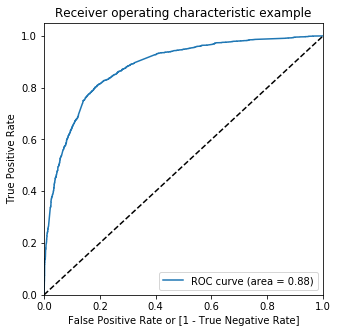

In [89]:
#plotting ROC curve
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

We have a pretty good ROC curve.

In [90]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.455509,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.104254,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.286724,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.727993,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.214328,3934,0,1,1,1,0,0,0,0,0,0,0


In [91]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.607452  0.973642  0.381809
0.2   0.2  0.722325  0.931873  0.593203
0.3   0.3  0.793290  0.834144  0.768116
0.4   0.4  0.814317  0.776561  0.837581
0.5   0.5  0.806122  0.672344  0.888556
0.6   0.6  0.797310  0.601379  0.918041
0.7   0.7  0.777829  0.505677  0.945527
0.8   0.8  0.751391  0.403893  0.965517
0.9   0.9  0.697279  0.222628  0.989755


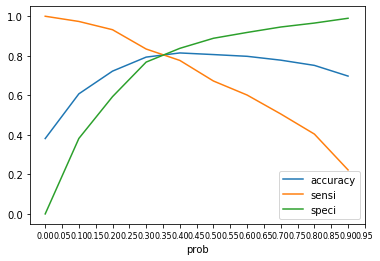

In [92]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.show()

From the plot we can see all the three curves meet at 0.35. So taking `0.35` as optimal cutoff.

In [93]:
#predicting based on optimal cutoff.
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.455509,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.104254,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.286724,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.727993,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.214328,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [94]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.8093692022263451

we can see there is no much difference in accuracy value.

In [95]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion2

array([[3243,  759],
       [ 474, 1992]], dtype=int64)

In [96]:
# Predicted     not_churn    churn
# Actual
# not_churn        3243      759
# churn            474       1992  

In [97]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [98]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8077858880778589

Sensitivity increased to `80.77%`

In [99]:
# Let us calculate specificity
TN / float(TN+FP)

0.8103448275862069

In [100]:
# Calculate false postive rate - predicting convertion when customer does not have converted
print(FP/ float(TN+FP))

0.1896551724137931


In [101]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7241003271537623


In [102]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8724778046811945


**Precison and Recall**

In [103]:
#importing libraries for calculating precision and recall
from sklearn.metrics import precision_score, recall_score

In [104]:
#precision score
precision_score(y_train_pred_final.Convert, y_train_pred_final.predicted)

0.7880228136882129

In [105]:
#recall score
recall_score(y_train_pred_final.Convert, y_train_pred_final.predicted)

0.6723438767234388

In [106]:
#importing library for precision recall curve
from sklearn.metrics import precision_recall_curve

In [107]:
#p, r, thresholds
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

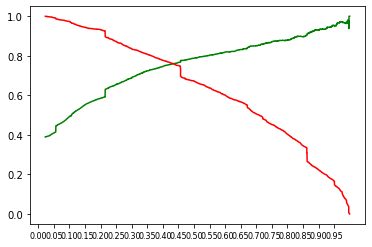

In [108]:
#plotting precision and recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.show()

From the precision and recall curve the final optimal cutoff is `0.41`

In [109]:
#predicting based on optimal cutoff.
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.41 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.455509,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.104254,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.286724,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.727993,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.214328,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [110]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.8161719233147805

In [111]:
#confusion matrix
confusion3 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion3

array([[3372,  630],
       [ 559, 1907]], dtype=int64)

In [112]:
# Predicted     not_churn    churn
# Actual
# not_churn        3372      630
# churn            559       1907  

In [113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8077858880778589

In [115]:
# Let us calculate specificity
TN / float(TN+FP)

0.8103448275862069

In [116]:
# Calculate false postive rate - predicting convertion when customer does not have converted
print(FP/ float(TN+FP))

0.1896551724137931


In [117]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7241003271537623


In [118]:
# Negative predictive value
print (TN / float(TN+ FN))


0.8724778046811945


In [119]:
#creating train_lead_score
train_lead_score = y_train_pred_final[['LeadID','Convert_Prob']]
train_lead_score.head()

,LeadID,Convert_Prob
0,1871,0.455509
1,6795,0.104254
2,3516,0.286724
3,8105,0.727993
4,3934,0.214328


In [120]:
#Assigning Lead score to the train_lead_score dataframe
train_lead_score['Lead score'] = train_lead_score.Convert_Prob*100
train_lead_score = train_lead_score.drop(['Convert_Prob'],1)
train_lead_score.head()

,LeadID,Lead score
0,1871,45.550944
1,6795,10.425369
2,3516,28.672438
3,8105,72.799291
4,3934,21.432779


## Making predictions on Test data

In [121]:
#scaling on X_test
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [122]:
#taking the same columns of train data
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Other_source,Lead Source_Olark Chat,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Hospitality Management,Specialization_Other_specialization,Occupation_Working Professional
4269,1.749143,0.964504,2.117849,0,0,0,0,0,0,1,0,0,1,0
2376,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,1,0,0,1,0
7766,0.662077,-0.777416,1.553761,0,0,0,0,0,0,0,1,0,0,1
9199,-1.149699,-0.885371,-1.266675,0,0,1,0,0,1,0,0,0,1,0
4359,-1.149699,-0.885371,-1.266675,0,1,0,0,1,0,0,0,0,0,0


In [123]:
#adding constant
X_test_sm = sm.add_constant(X_test)

In [124]:
#predicting based on the final model
y_test_pred = res.predict(X_test_sm)

In [125]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [126]:
# Let's see the head
y_pred_1.head()

,0
4269,0.670380
2376,0.862649
7766,0.806359
9199,0.055838
4359,0.862116


In [127]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [128]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [129]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [130]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [131]:
#seeing y_pred_final
y_pred_final.head()

,Converted,LeadID,0
0,1,4269,0.670380
1,1,2376,0.862649
2,1,7766,0.806359
3,0,9199,0.055838
4,1,4359,0.862116


In [132]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [133]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,LeadID,Convert_Prob
0,1,4269,0.670380
1,1,2376,0.862649
2,1,7766,0.806359
3,0,9199,0.055838
4,1,4359,0.862116


In [134]:
#adding final_predicted columns based on final optimal cutoff
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.41 else 0)

In [135]:
#seeing y_pred_final
y_pred_final.head()

,Converted,LeadID,Convert_Prob,final_predicted
0,1,4269,0.670380,1
1,1,2376,0.862649,1
2,1,7766,0.806359,1
3,0,9199,0.055838,0
4,1,4359,0.862116,1


In [136]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8095238095238095

In [137]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1410,  267],
       [ 261,  834]], dtype=int64)

In [138]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7616438356164383

In [140]:
# Let us calculate specificity
TN / float(TN+FP)

0.8407871198568873

In [141]:
#precision score
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7574931880108992

In [142]:
#recall score
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7616438356164383

In [143]:
#creating test_lead_score
test_lead_score = y_pred_final[['LeadID','Convert_Prob']]
test_lead_score.head()

,LeadID,Convert_Prob
0,4269,0.670380
1,2376,0.862649
2,7766,0.806359
3,9199,0.055838
4,4359,0.862116


In [144]:
#adding lead score to test_lead_score
test_lead_score['Lead score'] = test_lead_score.Convert_Prob*100
test_lead_score = test_lead_score.drop(['Convert_Prob'],1)
test_lead_score.head()

,LeadID,Lead score
0,4269,67.037966
1,2376,86.264886
2,7766,80.635891
3,9199,5.583807
4,4359,86.211612


## Conclusion :

- ~75% of Precision value indicates that 75% of the conversions that our model predicted is actually converted.
- ~76% of Recall value indicates that our model is able to predict 76% of actual conversion cases correctly.